# **Разведовочный анализ данных. Исследование и визуализация данных**

# 1) Текстовое описание набора данных

В качестве исходного набора данных будем использовать данные о наиболее дорогиз футболистах за 2021 год.
Задача является актуальной для специалистов трансферного рынгка ис портивных аналитиков.

Файл содержит следующие колонки:
- id - номер игрока в списке
- name - имя игрока
- position - позиция игрока на поле
- age - возраст игрока
- markey value in millions - рыночная стоимость игрока
- country - страна происхождения игрока
- club - клуб игрока
- matches - матчи, сыгранные в 2021 году
- goals - голы, забитые игроком в 2021 году
- own goals - автоголы, забитые игроком в 2021 году
- assists - голы, забитые с паса игрока
- yellow cards - число полученных желтых карточек
- second yellow cards - число полученных вторых желтых карточек
- red cards - число полученных красных карточек
- Number Of Substitute In - число замен при входе в игру
- Number Of Substitute Out - число замен на выход из игры

# Импорт библиотек

Импортируем библиотеки с помощью команды import.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файл датасета с помощью библиотеки Pandas.

In [2]:
df = pd.read_csv('players.csv')

# 2) Основные характеристики датасета

In [3]:
#вывод первых 5 строк
df.head()

Unnamed: 0            Name        Position  Age  \
0           0   Kylian Mbappé  Centre-Forward   22   
1           1  Erling Haaland  Centre-Forward   21   
2           2      Harry Kane  Centre-Forward   28   
3           3   Jack Grealish     Left Winger   26   
4           4   Mohamed Salah    Right Winger   29   

   Markey Value In Millions(£)  Country                 Club  Matches  Goals  \
0                        144.0   France  Paris Saint-Germain       16      7   
1                        135.0   Norway    Borussia Dortmund       10     13   
2                        108.0  England    Tottenham Hotspur       16      7   
3                         90.0  England      Manchester City       15      2   
4                         90.0    Egypt         Liverpool FC       15     15   

   Own Goals  Assists  Yellow Cards  Second Yellow Cards  Red Cards  \
0          0       11             3                    0          0   
1          0        4             1                    0          0   
2          0        2             2                    0          0   
3          0        3             1                    0          0   
4          0        6             1                    0          0   

   Number Of Substitute In  Number Of Substitute Out  
0                        0                         8  
1                        0                         1  
2                        2                         2  
3                        2                         8  
4                        0                         3

In [4]:
#Определение размера датасета
df.shape

(500, 16)

Размер датасета 500 строк, 16 столбцов

In [5]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 500


In [6]:
total_count = df.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего колонок: 16


In [7]:
#Список колонок
df.columns

Index(['Unnamed: 0', 'Name', 'Position', 'Age', 'Markey Value In Millions(£)',
       'Country', 'Club', 'Matches', 'Goals', 'Own Goals', 'Assists',
       'Yellow Cards', 'Second Yellow Cards', 'Red Cards',
       'Number Of Substitute In', 'Number Of Substitute Out'],
      dtype='object')

In [8]:
#Список колонок и тип данных
df.dtypes

Unnamed: 0                       int64
Name                            object
Position                        object
Age                              int64
Markey Value In Millions(£)    float64
Country                         object
Club                            object
Matches                          int64
Goals                            int64
Own Goals                        int64
Assists                          int64
Yellow Cards                     int64
Second Yellow Cards              int64
Red Cards                        int64
Number Of Substitute In          int64
Number Of Substitute Out         int64
dtype: object

In [9]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in df.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Unnamed: 0 - 0
Name - 0
Position - 0
Age - 0
Markey Value In Millions(£) - 0
Country - 0
Club - 0
Matches - 0
Goals - 0
Own Goals - 0
Assists - 0
Yellow Cards - 0
Second Yellow Cards - 0
Red Cards - 0
Number Of Substitute In - 0
Number Of Substitute Out - 0


In [10]:
# Основные статистические характеристки набора данных
df.describe()

Unnamed: 0         Age  Markey Value In Millions(£)     Matches  \
count  500.000000  500.000000                   500.000000  500.000000   
mean   249.500000   24.968000                    31.537800   12.396000   
std    144.481833    3.165916                    17.577697    4.342453   
min      0.000000   16.000000                    16.200000    0.000000   
25%    124.750000   23.000000                    19.800000   10.000000   
50%    249.500000   25.000000                    25.200000   13.000000   
75%    374.250000   27.000000                    36.000000   16.000000   
max    499.000000   36.000000                   144.000000   24.000000   

            Goals   Own Goals    Assists  Yellow Cards  Second Yellow Cards  \
count  500.000000  500.000000  500.00000    500.000000           500.000000   
mean     2.160000    0.030000    1.51200      1.592000             0.036000   
std      2.880102    0.170758    1.85276      1.445585             0.186477   
min      0.000000    0.000000    0.00000      0.000000             0.000000   
25%      0.000000    0.000000    0.00000      0.000000             0.000000   
50%      1.000000    0.000000    1.00000      1.000000             0.000000   
75%      3.000000    0.000000    2.00000      2.000000             0.000000   
max     23.000000    1.000000   12.00000      7.000000             1.000000   

        Red Cards  Number Of Substitute In  Number Of Substitute Out  
count  500.000000               500.000000                500.000000  
mean     0.046000                 2.394000                  3.744000  
std      0.209695                 2.517825                  3.293046  
min      0.000000                 0.000000                  0.000000  
25%      0.000000                 0.000000                  1.000000  
50%      0.000000                 2.000000                  3.000000  
75%      0.000000                 3.250000                  6.000000  
max      1.000000                13.000000                 20.000000

In [11]:
# Определим уникальные значения для целевого признака
df['Name'].unique()

array(['Kylian Mbappé', 'Erling Haaland', 'Harry Kane', 'Jack Grealish',
       'Mohamed Salah', 'Romelu Lukaku', 'Kevin De Bruyne', 'Neymar',
       'Jadon Sancho', 'Frenkie de Jong', 'Bruno Fernandes',
       'Joshua Kimmich', 'Raheem Sterling', 'Marcus Rashford',
       'Sadio Mané', 'Heung-min Son', 'Pedri', 'Phil Foden',
       'Lautaro Martínez', 'Marcos Llorente', 'Lionel Messi',
       'Mason Mount', 'Trent Alexander-Arnold', 'Rúben Dias',
       'Marquinhos', 'Jude Bellingham', 'João Félix', 'Alphonso Davies',
       'Achraf Hakimi', 'Declan Rice', 'Rodri', 'Mikel Oyarzabal',
       'Federico Chiesa', 'Matthijs de Ligt', 'Kai Havertz',
       'Sergej Milinković-Savić', 'Bernardo Silva', 'Raphaël Varane',
       'Serge Gnabry', 'Leon Goretzka', 'Jan Oblak', 'Casemiro',
       'Florian Wirtz', 'Bukayo Saka', 'Federico Valverde',
       'Gianluigi Donnarumma', 'Nicolò Barella', 'Andrew Robertson',
       'Ansu Fati', 'Jules Koundé', 'Victor Osimhen', 'Gabriel Jesus',
       'Dayo

# 3) Визуальное ислледование датасета

### Диаграмма рассеиния

<AxesSubplot: xlabel='Age', ylabel='Country'>

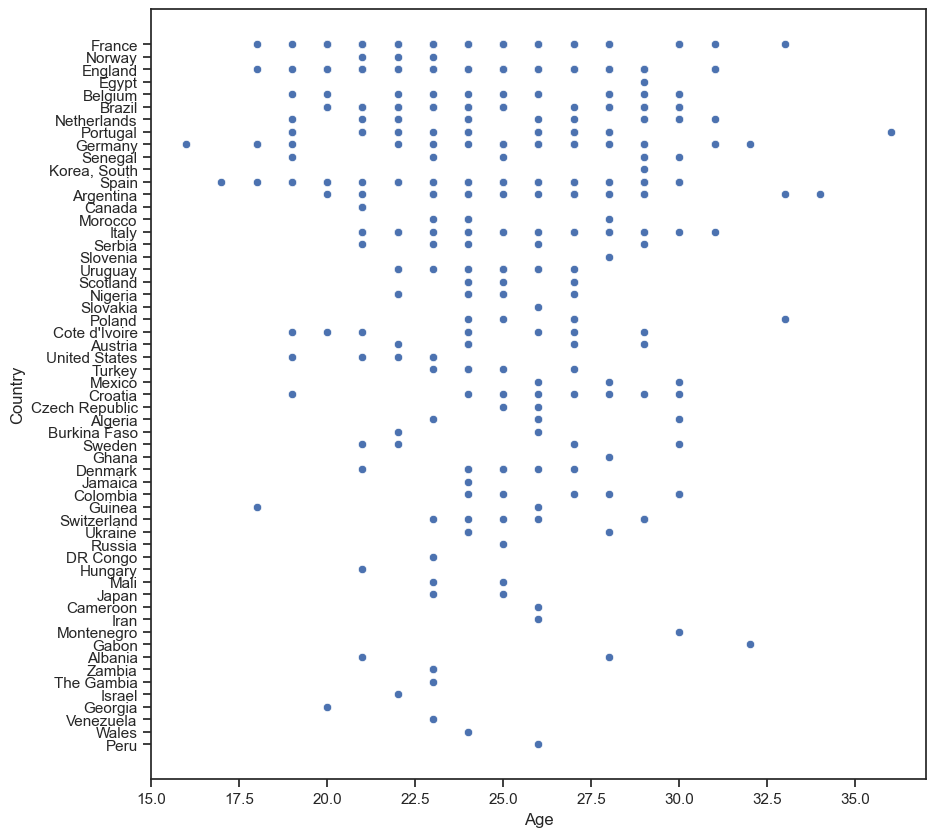

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Age', y='Country', data=df)

<AxesSubplot: xlabel='Markey Value In Millions(£)', ylabel='Country'>

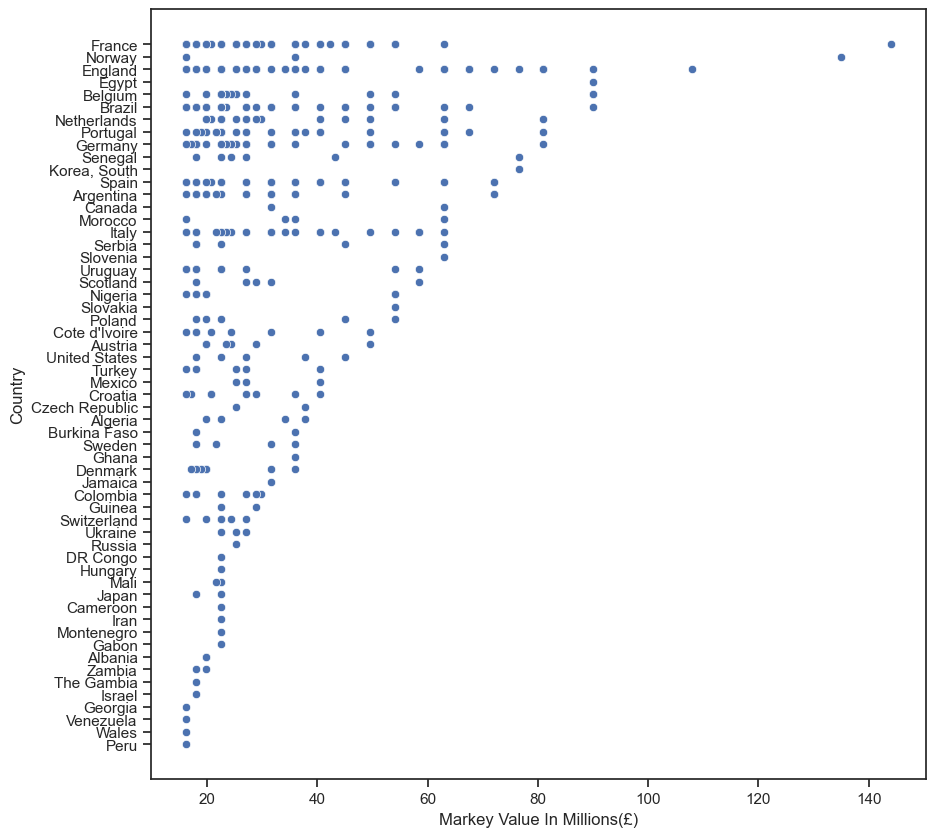

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Markey Value In Millions(£)', y='Country', data=df)

<AxesSubplot: xlabel='Markey Value In Millions(£)', ylabel='Country'>

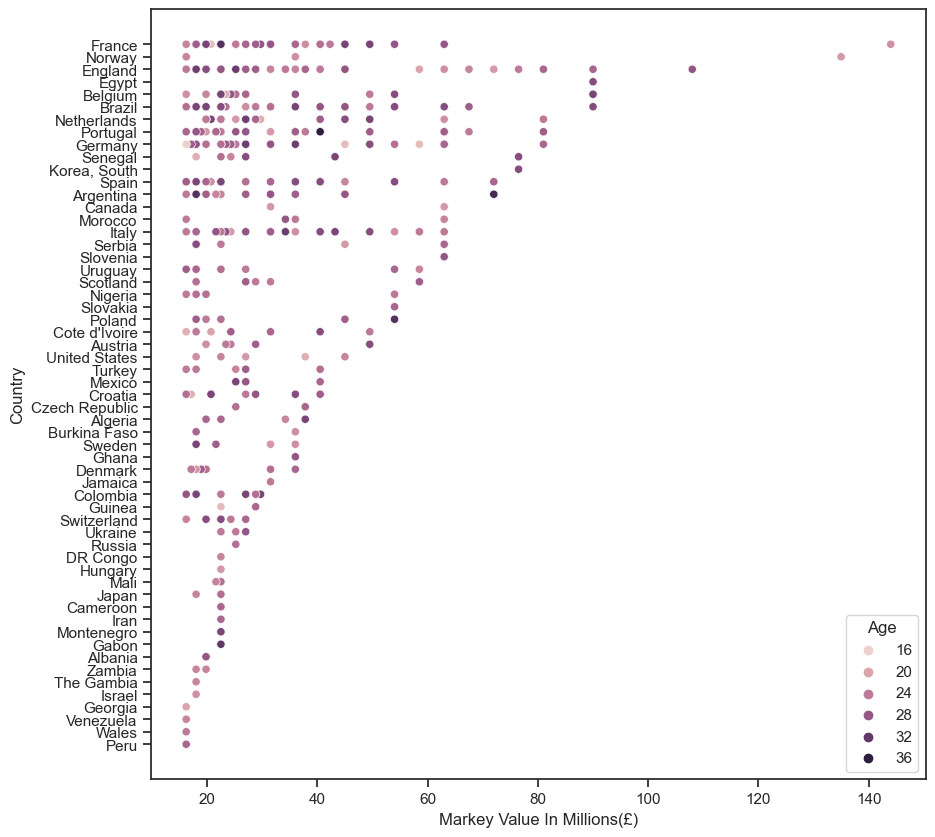

In [14]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Markey Value In Millions(£)', y='Country', data=df, hue='Age')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\2051692432.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<AxesSubplot: xlabel='Age', ylabel='Density'>

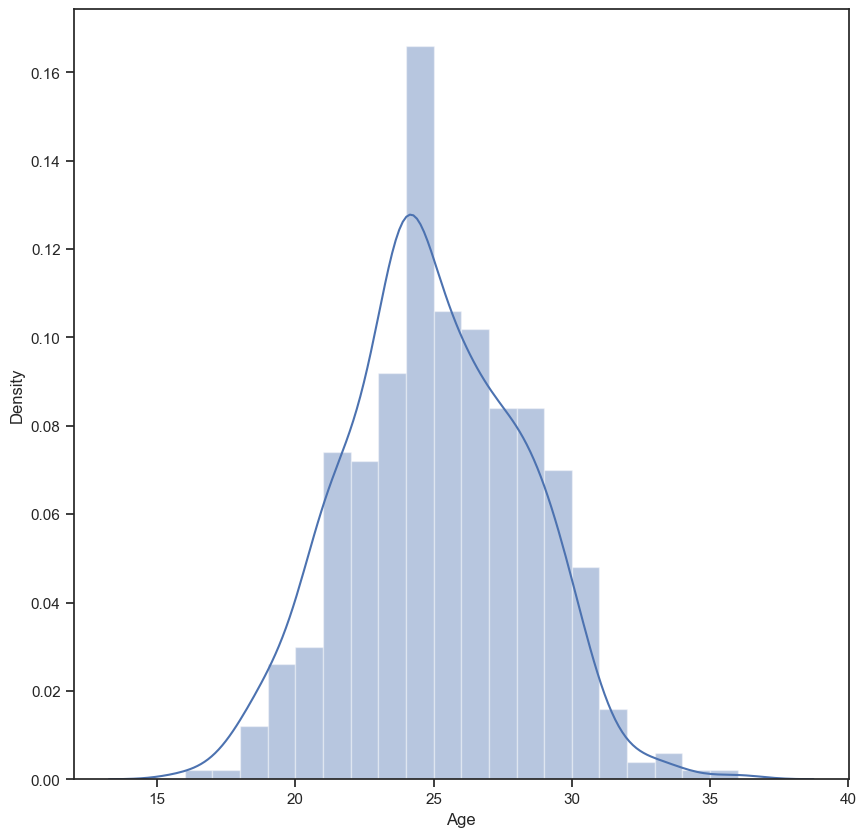

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(df['Age'])

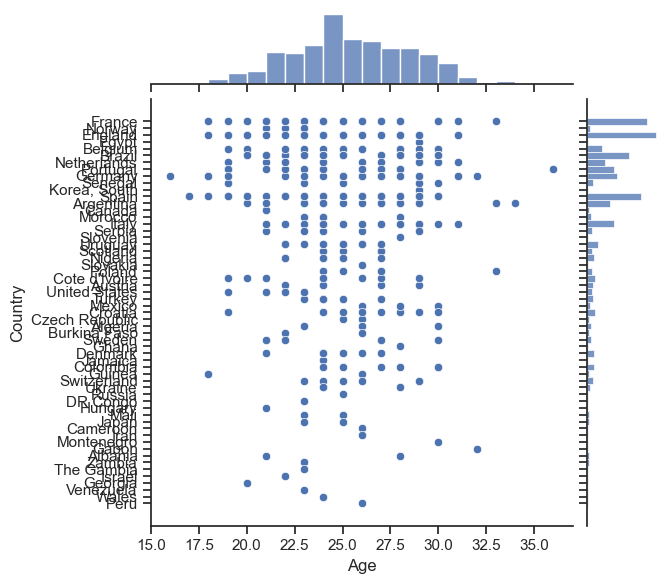

In [20]:
sns.jointplot(x='Age', y='Country', data=df)

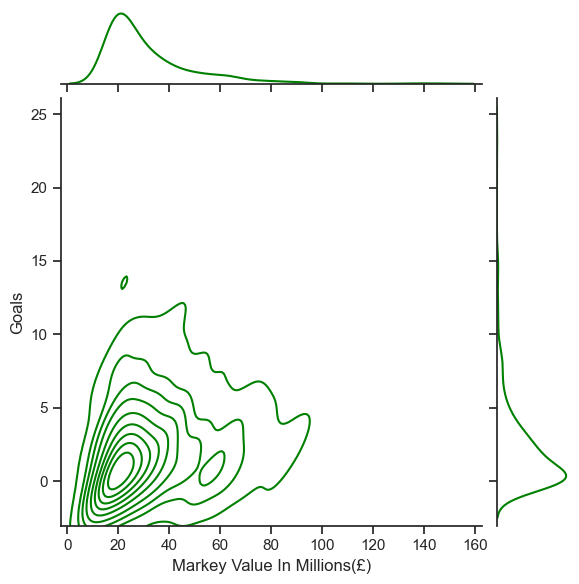

In [22]:
sns.jointplot(x='Markey Value In Millions(£)', y='Goals', data=df, kind="kde", color='green')

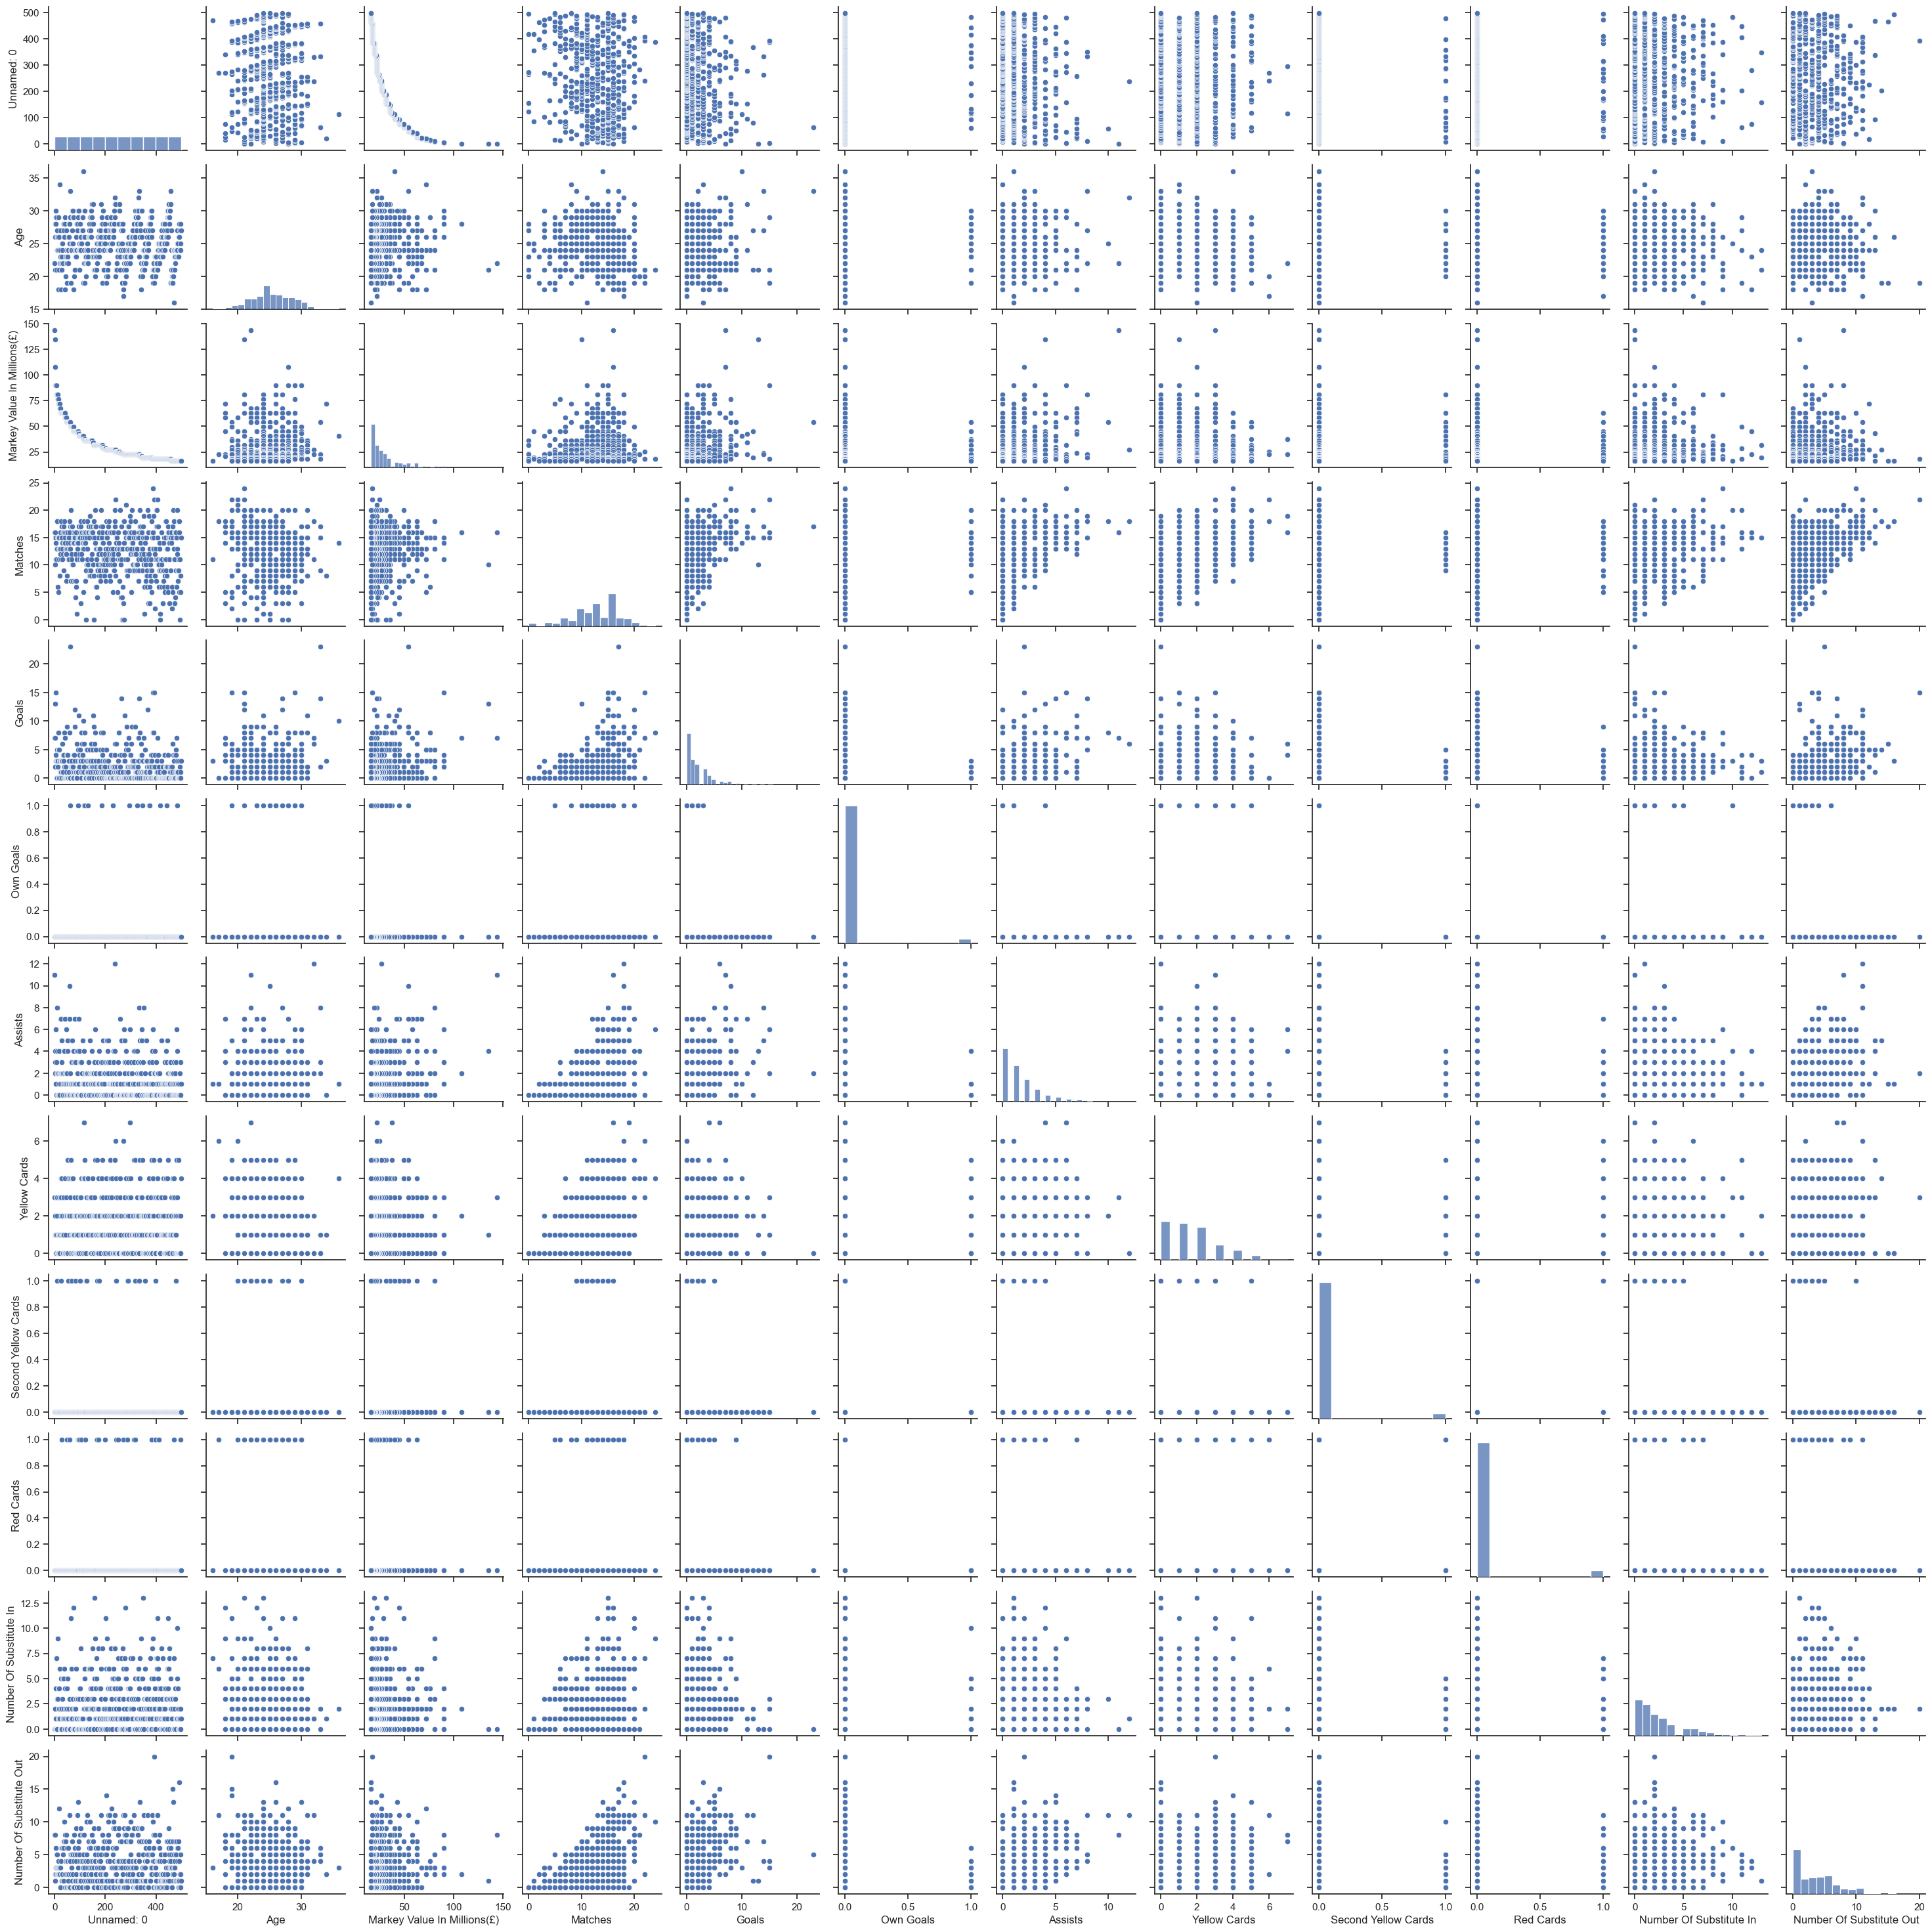

In [18]:
sns.pairplot(df)

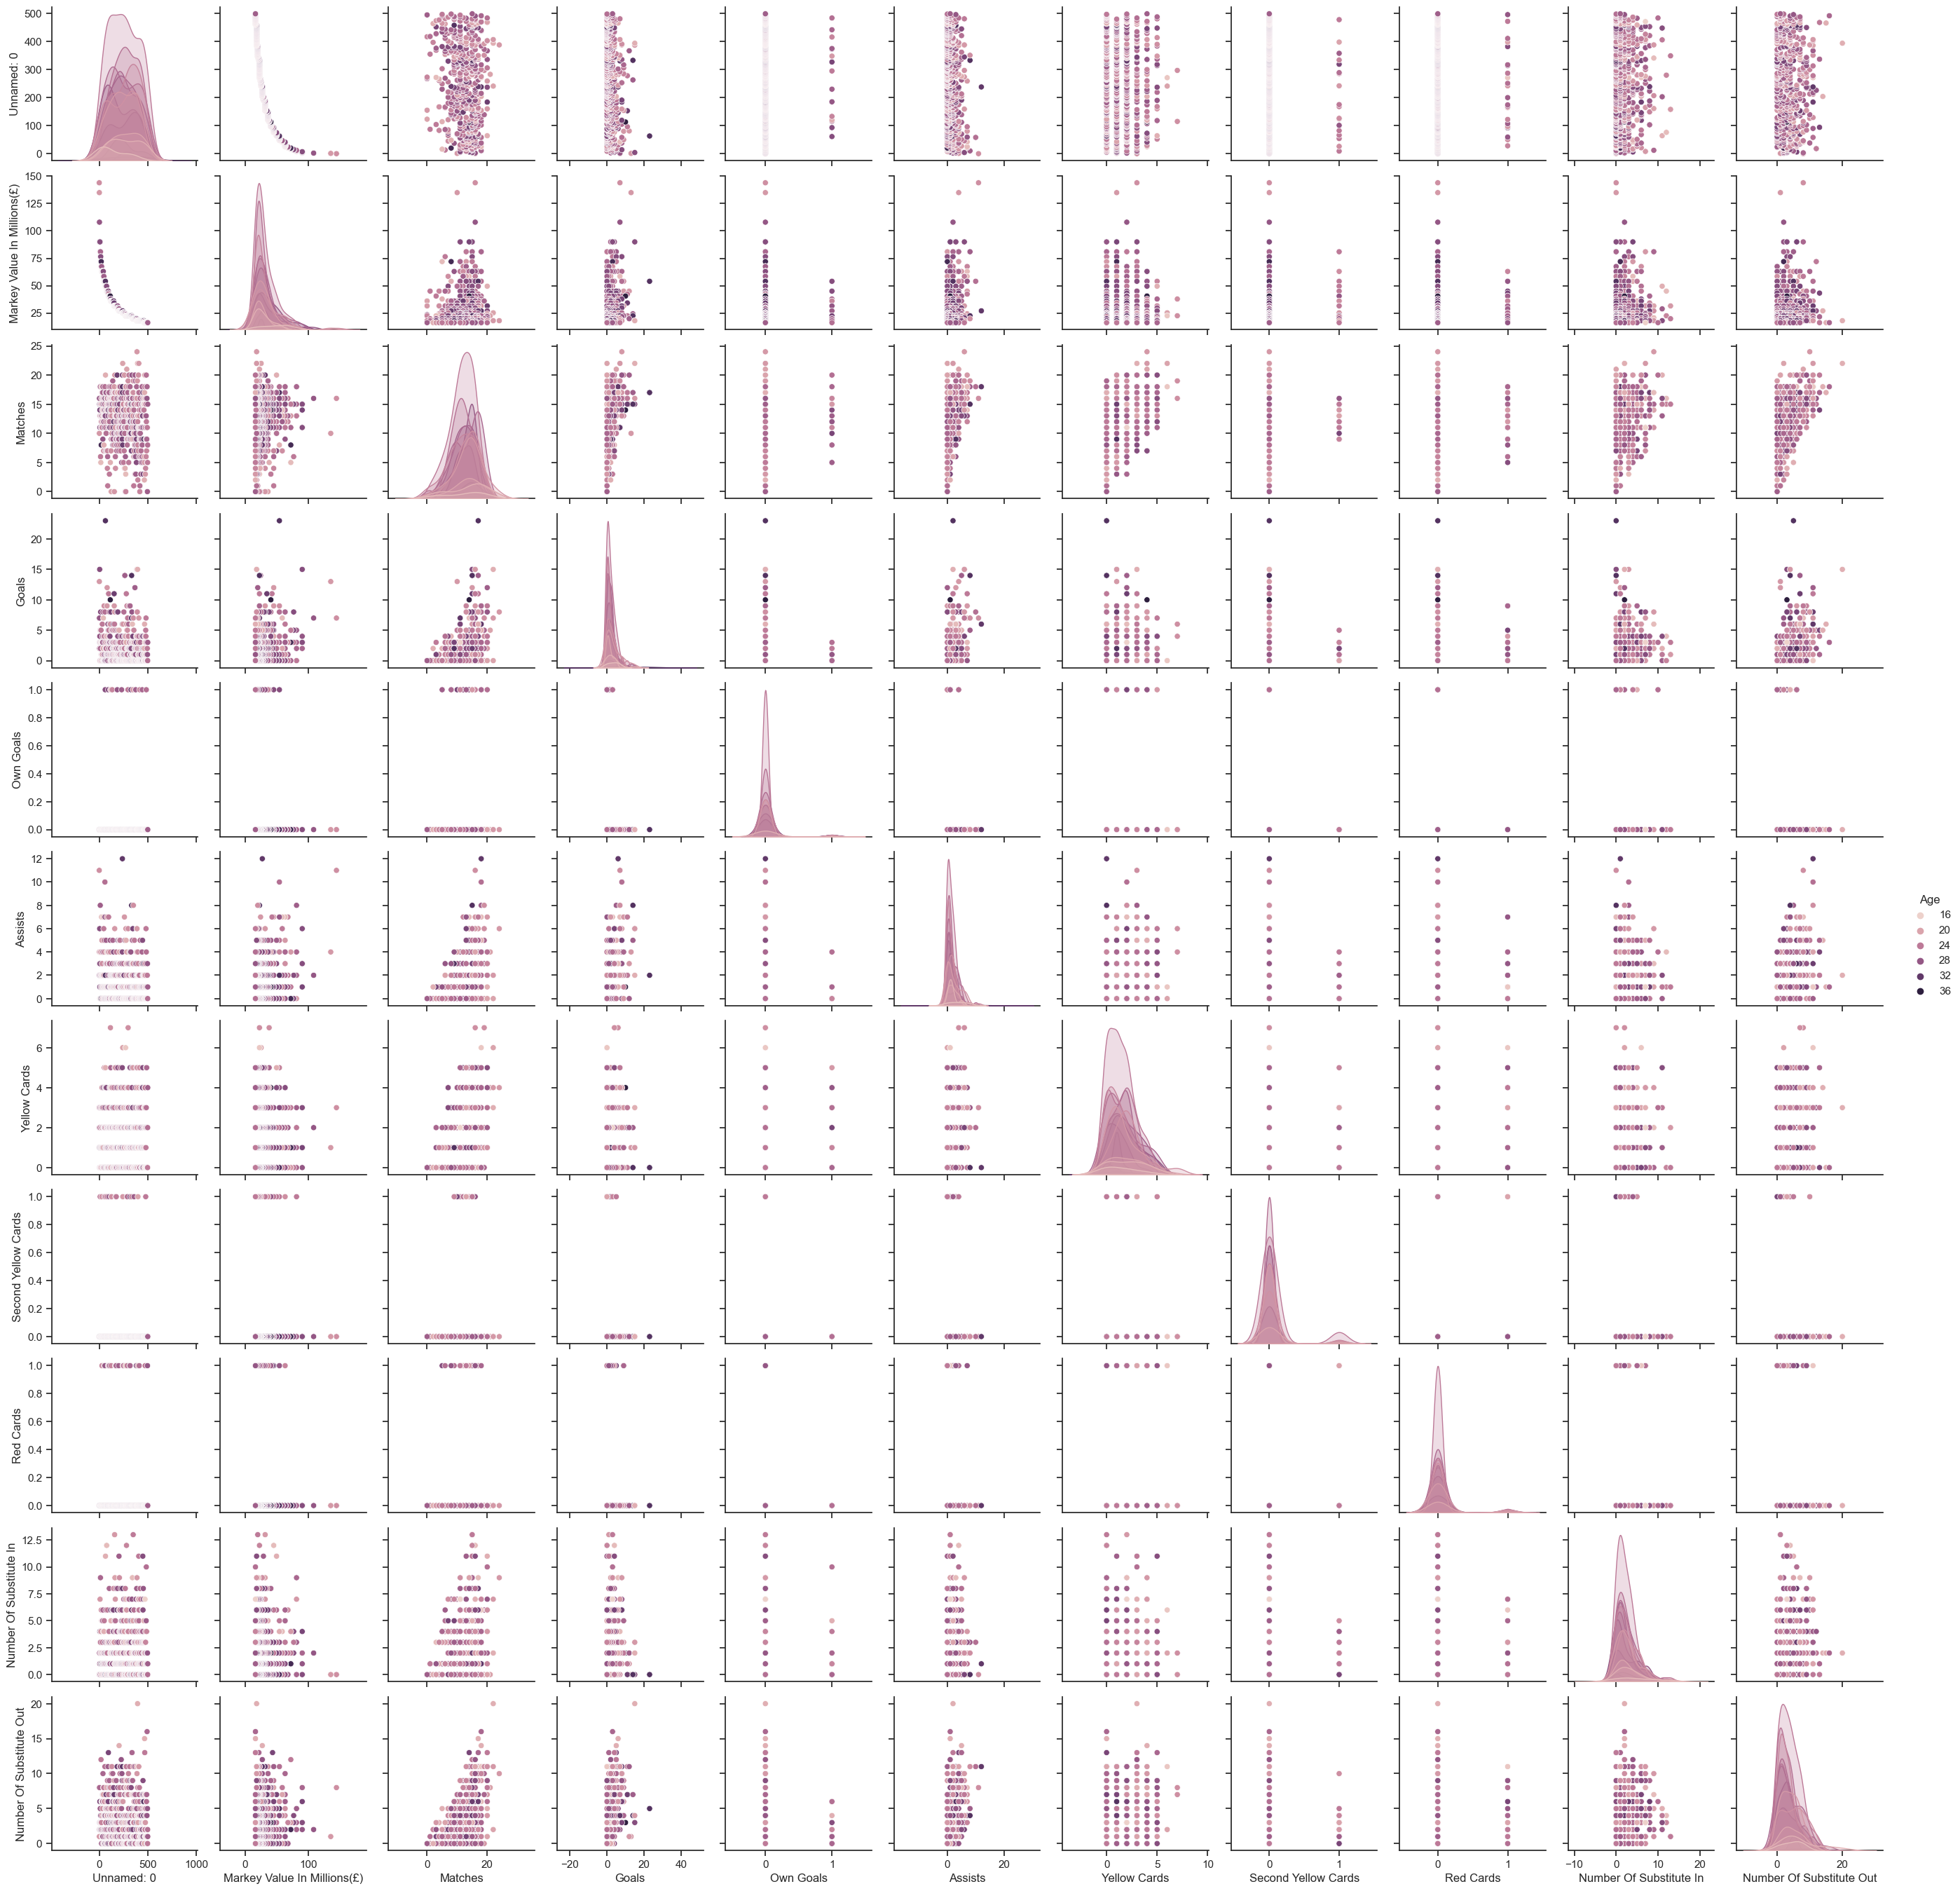

In [25]:
sns.pairplot(df, hue="Age")

<AxesSubplot: xlabel='Age'>

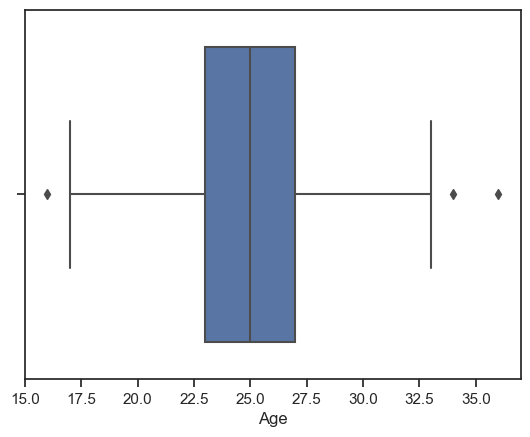

In [27]:
sns.boxplot(x=df['Age'])

<AxesSubplot: ylabel='Age'>

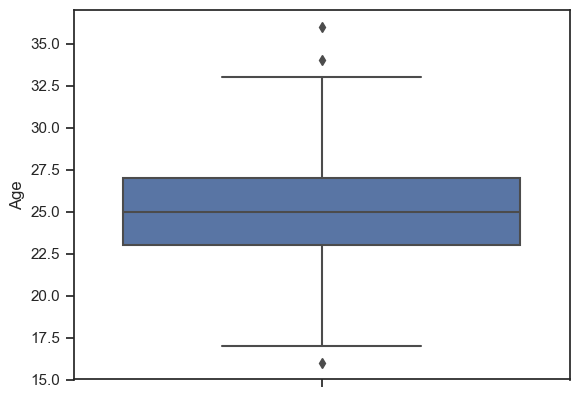

In [28]:
# По вертикали
sns.boxplot(y=df['Age'])

<AxesSubplot: xlabel='Markey Value In Millions(£)'>

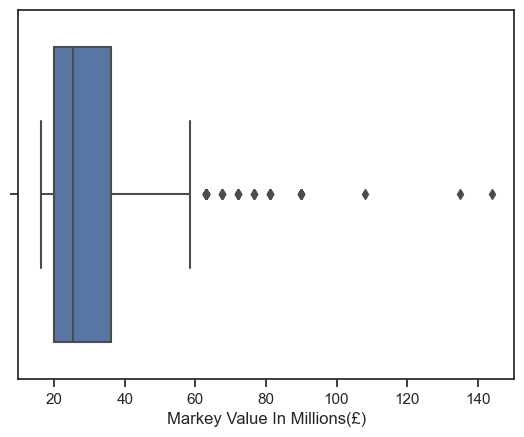

In [30]:
sns.boxplot(x=df['Markey Value In Millions(£)'])

<AxesSubplot: xlabel='Markey Value In Millions(£)', ylabel='Age'>

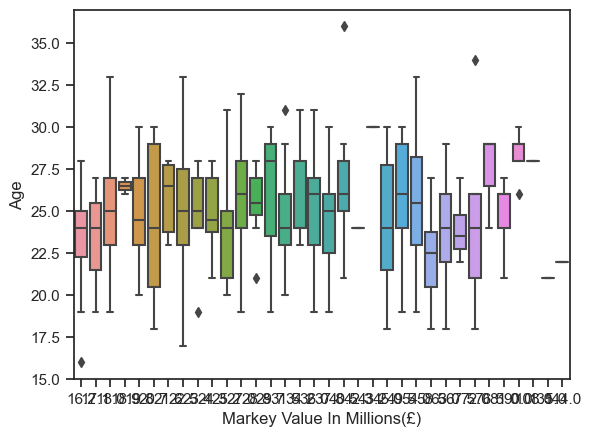

In [32]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Markey Value In Millions(£)', y='Age', data=df)

<AxesSubplot: xlabel='Age'>

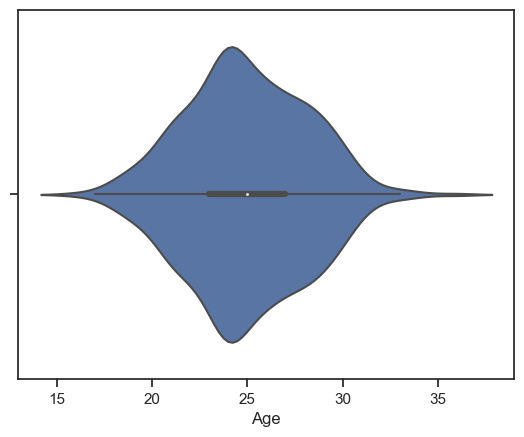

In [34]:
sns.violinplot(x=df['Age'])

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\2203891327.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], ax=ax[1], color='lime')


<AxesSubplot: xlabel='Age', ylabel='Density'>

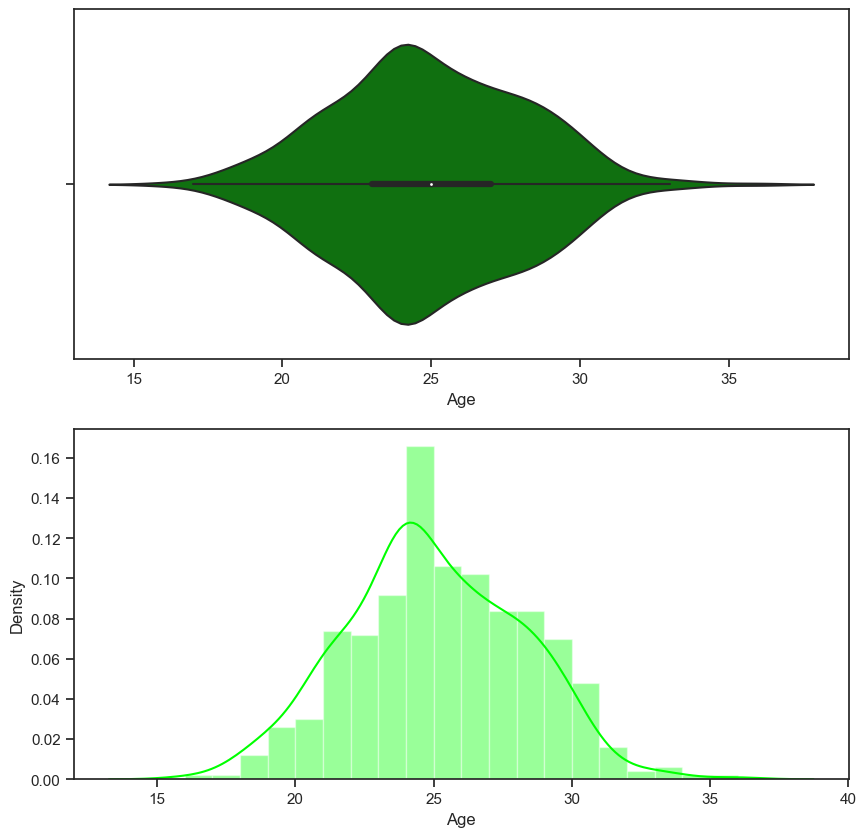

In [38]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=df['Age'], color='green')
sns.distplot(df['Age'], ax=ax[1], color='lime')

<AxesSubplot: xlabel='Goals', ylabel='Assists'>

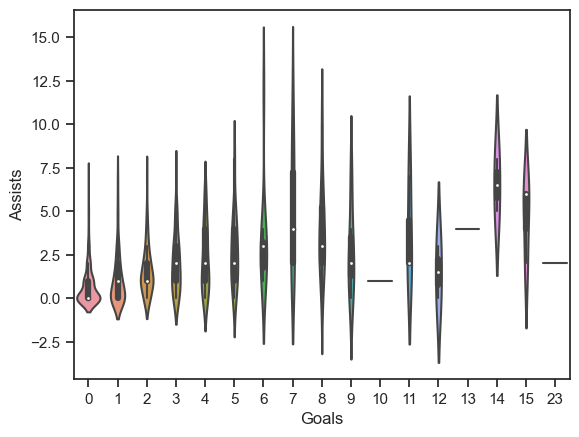

In [44]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.violinplot(x='Goals', y='Assists', data=df)

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

1) Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Occupancy"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2) Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [46]:
df.corr()

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Unnamed: 0       Age  \
Unnamed: 0                     1.000000 -0.031027   
Age                           -0.031027  1.000000   
Markey Value In Millions(£)   -0.840651  0.047794   
Matches                       -0.123702 -0.029396   
Goals                         -0.172072  0.056607   
Own Goals                      0.020754  0.038849   
Assists                       -0.165223 -0.041616   
Yellow Cards                  -0.036231 -0.059783   
Second Yellow Cards           -0.063670 -0.055751   
Red Cards                     -0.035685 -0.012872   
Number Of Substitute In        0.055554 -0.135682   
Number Of Substitute Out      -0.011886 -0.110354   

                             Markey Value In Millions(£)   Matches     Goals  \
Unnamed: 0                                     -0.840651 -0.123702 -0.172072   
Age                                             0.047794 -0.029396  0.056607   
Markey Value In Millions(£)                     1.000000  0.112774  0.213461   
Matches                                         0.112774  1.000000  0.368270   
Goals                                           0.213461  0.368270  1.000000   
Own Goals                                      -0.032827  0.037999 -0.091276   
Assists                                         0.228183  0.407905  0.472086   
Yellow Cards                                    0.003802  0.409519  0.024856   
Second Yellow Cards                             0.041953 -0.000317 -0.055523   
Red Cards                                       0.001485  0.019569 -0.022166   
Number Of Substitute In                        -0.085958  0.224711  0.084144   
Number Of Substitute Out                        0.000946  0.477138  0.437487   

                             Own Goals   Assists  Yellow Cards  \
Unnamed: 0                    0.020754 -0.165223     -0.036231   
Age                           0.038849 -0.041616     -0.059783   
Markey Value In Millions(£)  -0.032827  0.228183      0.003802   
Matches                       0.037999  0.407905      0.409519   
Goals                        -0.091276  0.472086      0.024856   
Own Goals                     1.000000 -0.092988      0.057804   
Assists                      -0.092988  1.000000      0.133521   
Yellow Cards                  0.057804  0.133521      1.000000   
Second Yellow Cards          -0.033985 -0.041855      0.076899   
Red Cards                    -0.038617  0.001155      0.088482   
Number Of Substitute In      -0.041531  0.083829     -0.065864   
Number Of Substitute Out     -0.096794  0.452794      0.133355   

                             Second Yellow Cards  Red Cards  \
Unnamed: 0                             -0.063670  -0.035685   
Age                                    -0.055751  -0.012872   
Markey Value In Millions(£)             0.041953   0.001485   
Matches                                -0.000317   0.019569   
Goals                                  -0.055523  -0.022166   
Own Goals                              -0.033985  -0.038617   
Assists                                -0.041855   0.001155   
Yellow Cards                            0.076899   0.088482   
Second Yellow Cards                     1.000000   0.060064   
Red Cards                               0.060064   1.000000   
Number Of Substitute In                -0.077221  -0.030601   
Number Of Substitute Out               -0.066548  -0.006129   

                             Number Of Substitute In  Number Of Substitute Out  
Unnamed: 0                                  0.055554                 -0.011886  
Age                                        -0.135682                 -0.110354  
Markey Value In Millions(£)                -0.085958                  0.000946  
Matches                                     0.224711                  0.477138  
Goals                                       0.084144                  0.437487  
Own Goals                                  -0.041531                 -0.096794  
Assists                                     0.083829

In [50]:
df.corr(method='pearson')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\1928163937.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson')


Unnamed: 0       Age  \
Unnamed: 0                     1.000000 -0.031027   
Age                           -0.031027  1.000000   
Markey Value In Millions(£)   -0.840651  0.047794   
Matches                       -0.123702 -0.029396   
Goals                         -0.172072  0.056607   
Own Goals                      0.020754  0.038849   
Assists                       -0.165223 -0.041616   
Yellow Cards                  -0.036231 -0.059783   
Second Yellow Cards           -0.063670 -0.055751   
Red Cards                     -0.035685 -0.012872   
Number Of Substitute In        0.055554 -0.135682   
Number Of Substitute Out      -0.011886 -0.110354   

                             Markey Value In Millions(£)   Matches     Goals  \
Unnamed: 0                                     -0.840651 -0.123702 -0.172072   
Age                                             0.047794 -0.029396  0.056607   
Markey Value In Millions(£)                     1.000000  0.112774  0.213461   
Matches                                         0.112774  1.000000  0.368270   
Goals                                           0.213461  0.368270  1.000000   
Own Goals                                      -0.032827  0.037999 -0.091276   
Assists                                         0.228183  0.407905  0.472086   
Yellow Cards                                    0.003802  0.409519  0.024856   
Second Yellow Cards                             0.041953 -0.000317 -0.055523   
Red Cards                                       0.001485  0.019569 -0.022166   
Number Of Substitute In                        -0.085958  0.224711  0.084144   
Number Of Substitute Out                        0.000946  0.477138  0.437487   

                             Own Goals   Assists  Yellow Cards  \
Unnamed: 0                    0.020754 -0.165223     -0.036231   
Age                           0.038849 -0.041616     -0.059783   
Markey Value In Millions(£)  -0.032827  0.228183      0.003802   
Matches                       0.037999  0.407905      0.409519   
Goals                        -0.091276  0.472086      0.024856   
Own Goals                     1.000000 -0.092988      0.057804   
Assists                      -0.092988  1.000000      0.133521   
Yellow Cards                  0.057804  0.133521      1.000000   
Second Yellow Cards          -0.033985 -0.041855      0.076899   
Red Cards                    -0.038617  0.001155      0.088482   
Number Of Substitute In      -0.041531  0.083829     -0.065864   
Number Of Substitute Out     -0.096794  0.452794      0.133355   

                             Second Yellow Cards  Red Cards  \
Unnamed: 0                             -0.063670  -0.035685   
Age                                    -0.055751  -0.012872   
Markey Value In Millions(£)             0.041953   0.001485   
Matches                                -0.000317   0.019569   
Goals                                  -0.055523  -0.022166   
Own Goals                              -0.033985  -0.038617   
Assists                                -0.041855   0.001155   
Yellow Cards                            0.076899   0.088482   
Second Yellow Cards                     1.000000   0.060064   
Red Cards                               0.060064   1.000000   
Number Of Substitute In                -0.077221  -0.030601   
Number Of Substitute Out               -0.066548  -0.006129   

                             Number Of Substitute In  Number Of Substitute Out  
Unnamed: 0                                  0.055554                 -0.011886  
Age                                        -0.135682                 -0.110354  
Markey Value In Millions(£)                -0.085958                  0.000946  
Matches                                     0.224711                  0.477138  
Goals                                       0.084144                  0.437487  
Own Goals                                  -0.041531                 -0.096794  
Assists                                     0.083829

In [54]:
df.corr(method='kendall')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\1723791258.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='kendall')


ModuleNotFoundError: No module named 'scipy'

In [55]:
df.corr(method='spearman')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\1222267885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='spearman')


Unnamed: 0       Age  \
Unnamed: 0                     1.000000 -0.028830   
Age                           -0.028830  1.000000   
Markey Value In Millions(£)   -0.996407  0.089105   
Matches                       -0.120222 -0.052242   
Goals                         -0.193555  0.035237   
Own Goals                      0.020754  0.046780   
Assists                       -0.150669 -0.032752   
Yellow Cards                  -0.048696 -0.030374   
Second Yellow Cards           -0.063670 -0.066797   
Red Cards                     -0.035685 -0.003424   
Number Of Substitute In        0.059360 -0.132148   
Number Of Substitute Out      -0.039501 -0.104027   

                             Markey Value In Millions(£)   Matches     Goals  \
Unnamed: 0                                     -0.996407 -0.120222 -0.193555   
Age                                             0.089105 -0.052242  0.035237   
Markey Value In Millions(£)                     1.000000  0.109343  0.191587   
Matches                                         0.109343  1.000000  0.371900   
Goals                                           0.191587  0.371900  1.000000   
Own Goals                                      -0.016060  0.034348 -0.107108   
Assists                                         0.147096  0.421626  0.502999   
Yellow Cards                                    0.039076  0.386002  0.049976   
Second Yellow Cards                             0.057107 -0.021453 -0.038466   
Red Cards                                       0.032229  0.014499 -0.035603   
Number Of Substitute In                        -0.065191  0.177082  0.219114   
Number Of Substitute Out                        0.031596  0.439418  0.481925   

                             Own Goals   Assists  Yellow Cards  \
Unnamed: 0                    0.020754 -0.150669     -0.048696   
Age                           0.046780 -0.032752     -0.030374   
Markey Value In Millions(£)  -0.016060  0.147096      0.039076   
Matches                       0.034348  0.421626      0.386002   
Goals                        -0.107108  0.502999      0.049976   
Own Goals                     1.000000 -0.115023      0.050303   
Assists                      -0.115023  1.000000      0.141150   
Yellow Cards                  0.050303  0.141150      1.000000   
Second Yellow Cards          -0.033985 -0.032572      0.099313   
Red Cards                    -0.038617  0.002852      0.077371   
Number Of Substitute In      -0.062330  0.182926     -0.085237   
Number Of Substitute Out     -0.101096  0.509122      0.111688   

                             Second Yellow Cards  Red Cards  \
Unnamed: 0                             -0.063670  -0.035685   
Age                                    -0.066797  -0.003424   
Markey Value In Millions(£)             0.057107   0.032229   
Matches                                -0.021453   0.014499   
Goals                                  -0.038466  -0.035603   
Own Goals                              -0.033985  -0.038617   
Assists                                -0.032572   0.002852   
Yellow Cards                            0.099313   0.077371   
Second Yellow Cards                     1.000000   0.060064   
Red Cards                               0.060064   1.000000   
Number Of Substitute In                -0.071373  -0.030205   
Number Of Substitute Out               -0.061417  -0.002331   

                             Number Of Substitute In  Number Of Substitute Out  
Unnamed: 0                                  0.059360                 -0.039501  
Age                                        -0.132148                 -0.104027  
Markey Value In Millions(£)                -0.065191                  0.031596  
Matches                                     0.177082                  0.439418  
Goals                                       0.219114                  0.481925  
Own Goals                                  -0.062330                 -0.101096  
Assists                                     0.182926

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

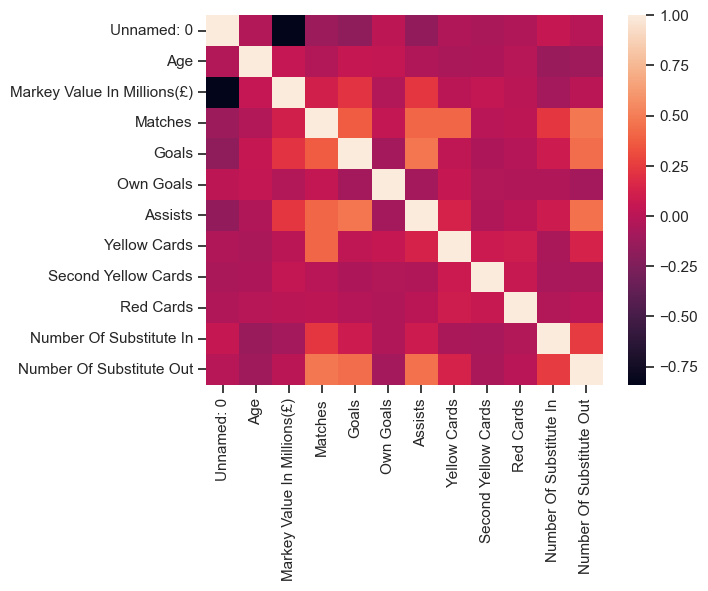

In [57]:
sns.heatmap(df.corr())

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\958188786.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.2f')


<AxesSubplot: >

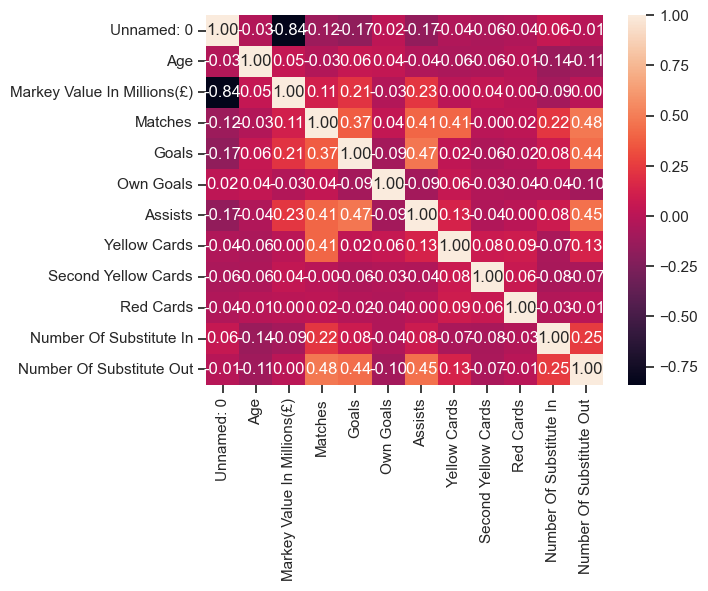

In [59]:
# Вывод значений в ячейках
sns.heatmap(df.corr(), annot=True, fmt='.2f')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\3697374902.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt='.2f', linewidths=.5)


<AxesSubplot: >

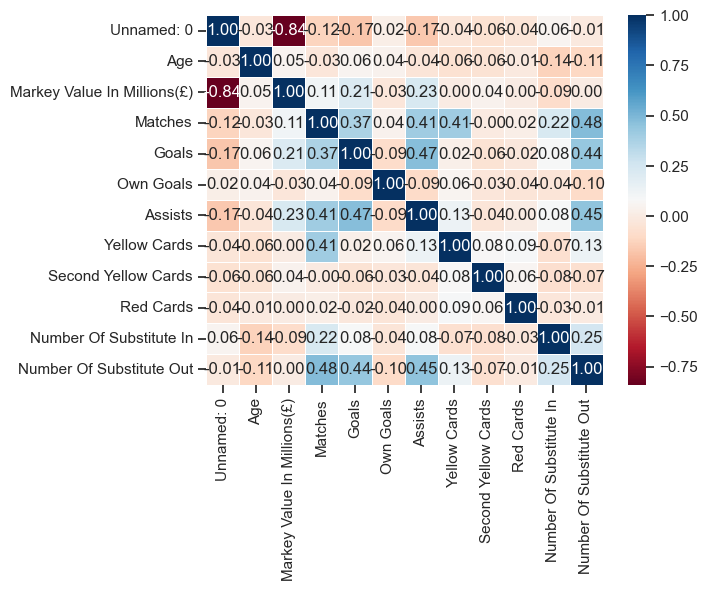

In [63]:
# Изменение цветовой гаммы
sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt='.2f', linewidths=.5)

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\4151092195.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.zeros_like(df.corr(), dtype=np.bool)
C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\4151092195.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df.corr(), dtype=np.bool)
C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\4151092195.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it wil

<AxesSubplot: >

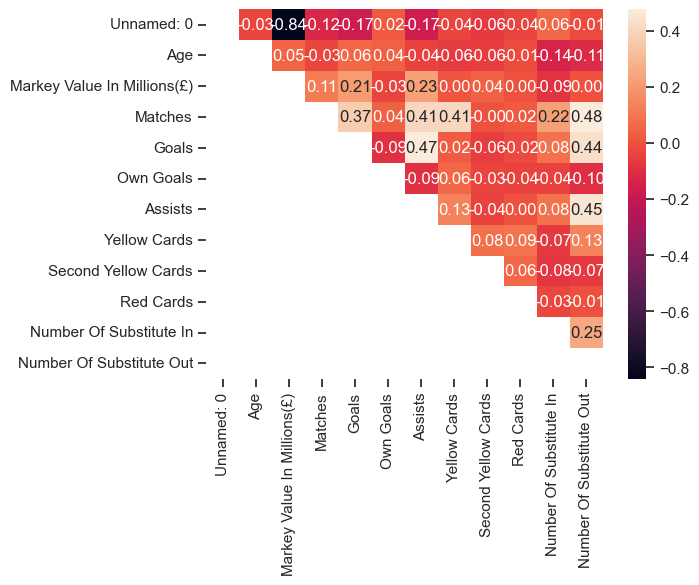

In [65]:
# Треугольный вариант матрицы
mask = np.zeros_like(df.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(df.corr(), mask=mask, annot=True, fmt='.2f')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\2444923100.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\2444923100.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')


ModuleNotFoundError: No module named 'scipy'

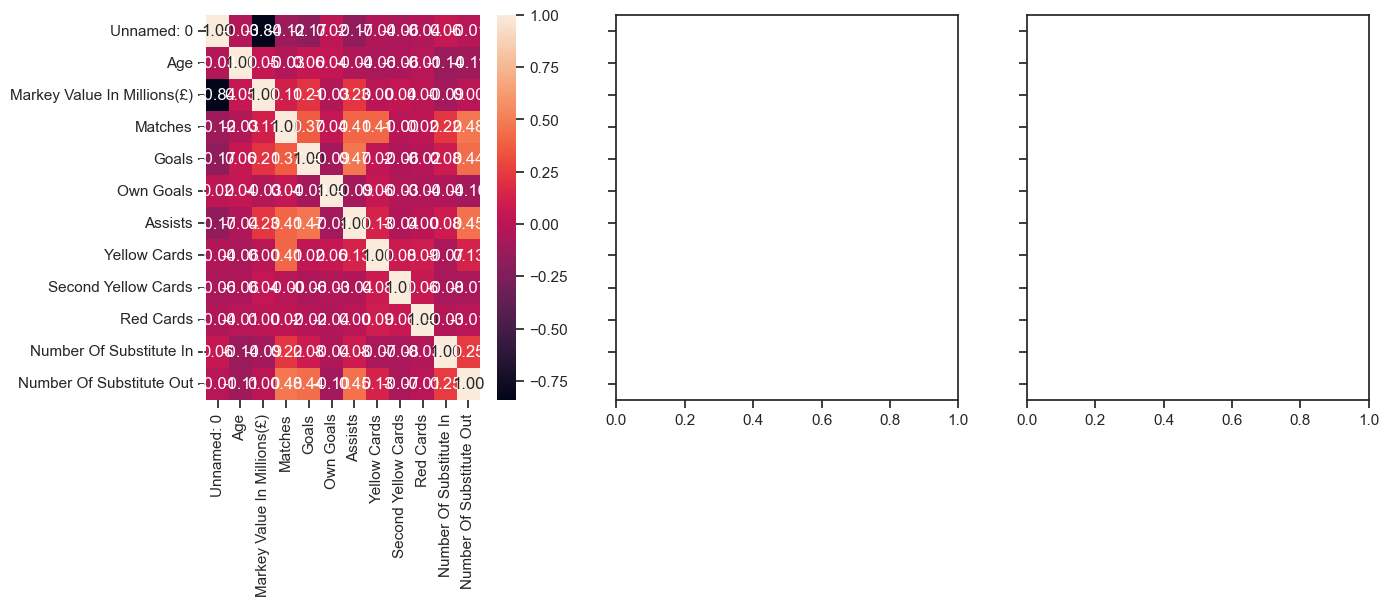

In [66]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(df.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(df.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

C:\Users\Артемий\AppData\Local\Temp\ipykernel_10120\2908733683.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')


<AxesSubplot: >

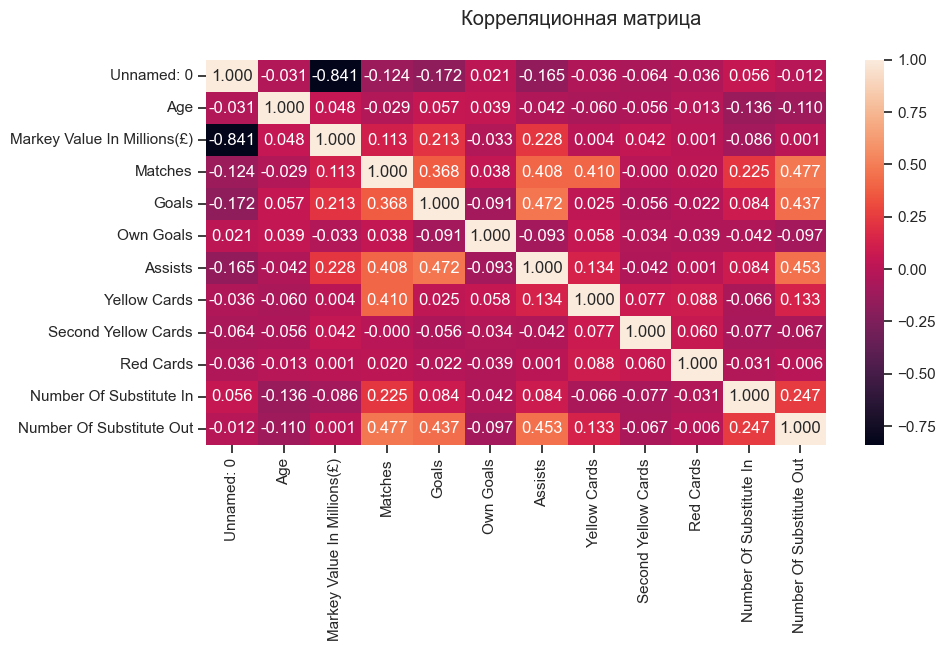

In [67]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(df.corr(), ax=ax, annot=True, fmt='.3f')